In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali sales Data.csv',encoding='unicode_escape')
# to avoid getting error we use unicode_escape

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status','unnamed1'],axis =1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.shape

(11251, 13)

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(11239, 13)

In [12]:
df['Amount']=df['Amount'].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [14]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
df['Amount'].dtype

dtype('int32')

In [16]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Exploratery data analysis

#### Gender

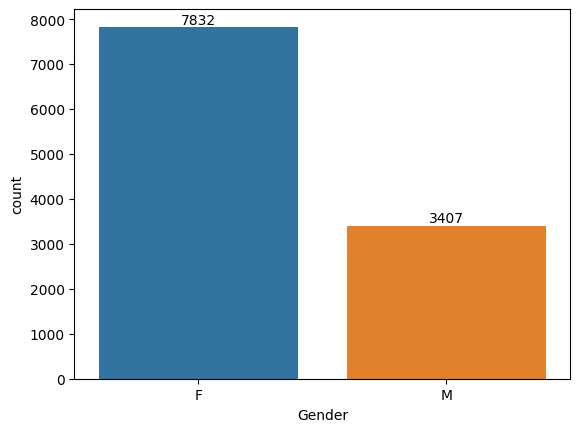

In [18]:
ax = sns.countplot(x='Gender', data =df)
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Gender', ylabel='Amount'>

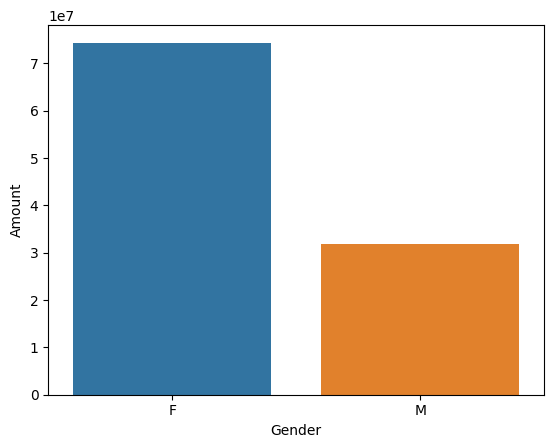

In [19]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by=['Amount'],ascending=False)

sns.barplot(x='Gender',y='Amount',data=sales_gen)


Females are spending more amount on shopping then males

#### Age

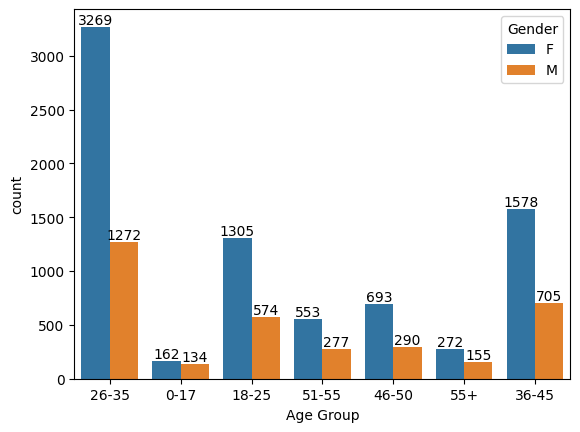

In [20]:
ax=sns.countplot(x='Age Group',hue='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

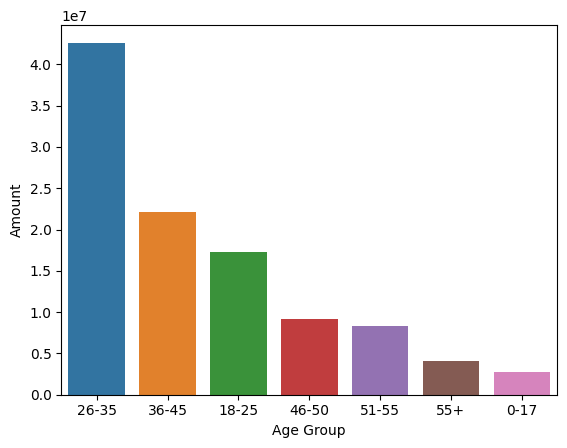

In [21]:
sales_age=df.groupby('Age Group',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_age)
# sales_age

from the above graphs we can say that most buyers are female of age between 26-35

#### states

<Axes: xlabel='State', ylabel='Orders'>

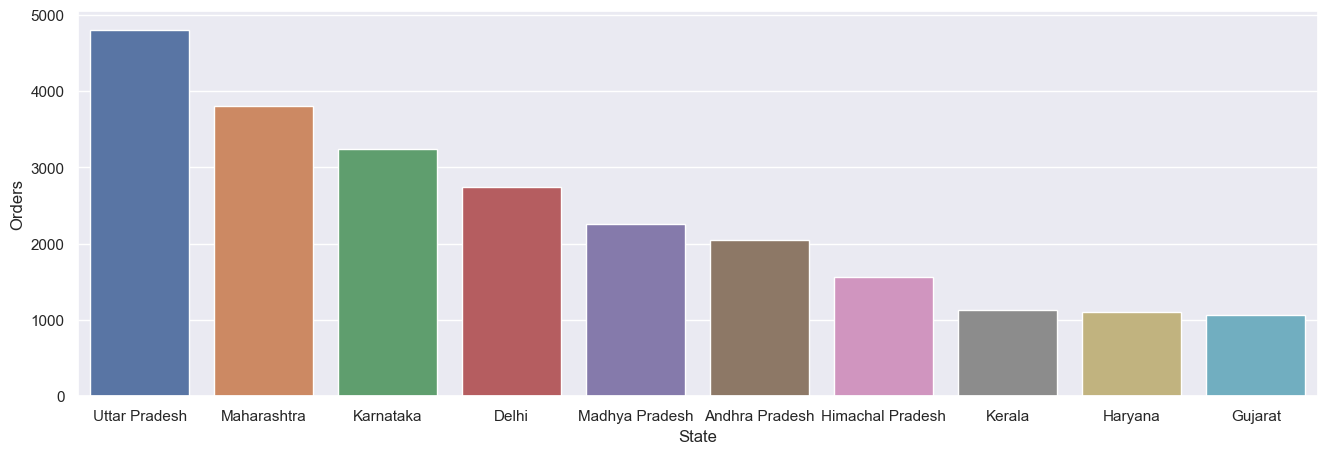

In [22]:
sales_state=df.groupby('State',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})

sns.barplot(data=sales_state,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

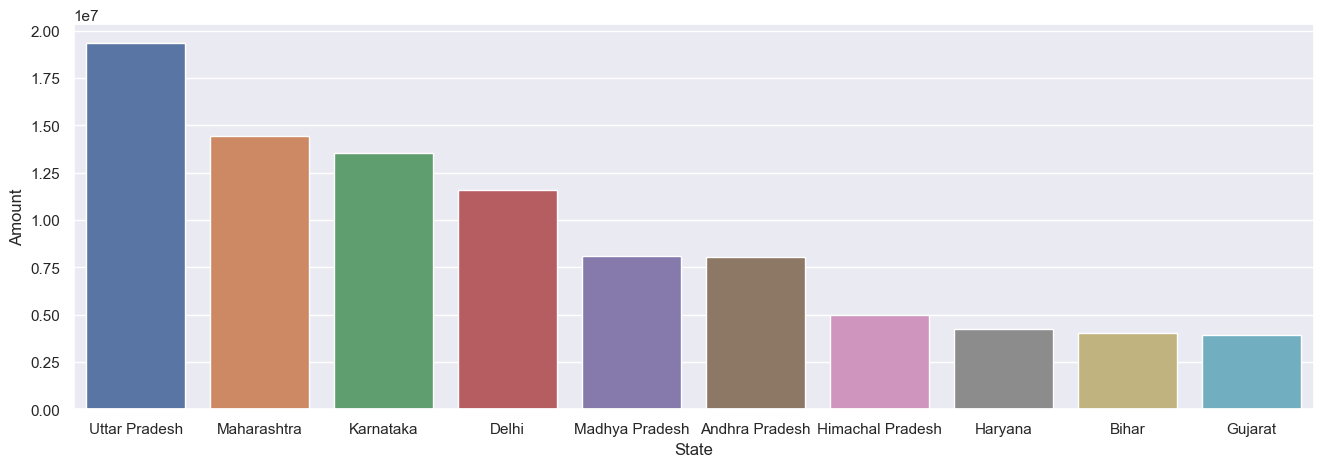

In [23]:
sales_amt=df.groupby('State',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(data=sales_amt,x='State',y='Amount')

From above graph we can say that Uttar Pradesh, Maharashtra, Karanataka people are mostly order items respectively sales are also good

#### Maritial_status

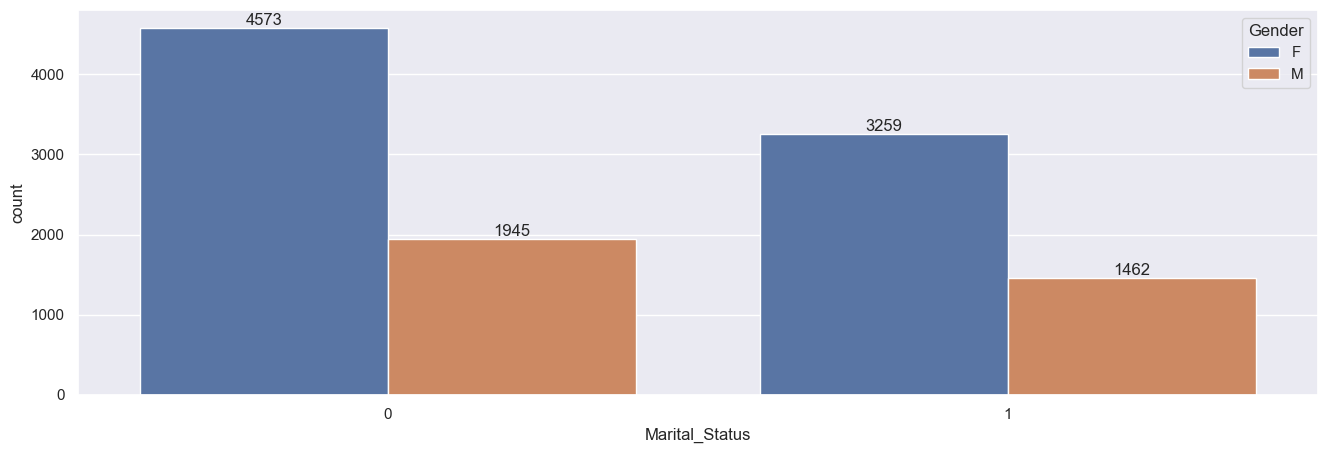

In [24]:
ax=sns.countplot(data=df,x='Marital_Status',hue='Gender')
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

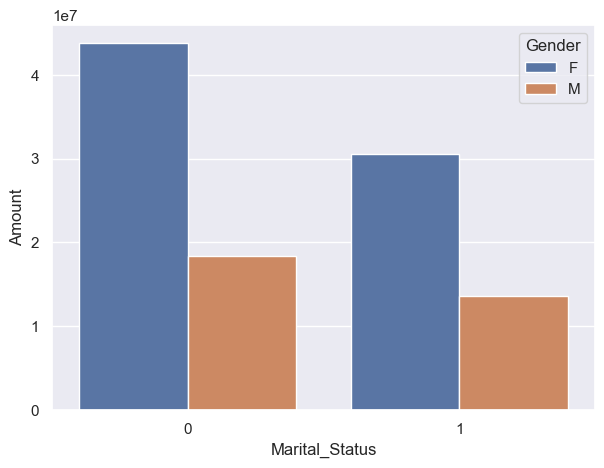

In [25]:
sales_maried=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data=sales_maried,x='Marital_Status',y='Amount',hue='Gender')

Married women orders more and purchasing power is also more

#### Occupation

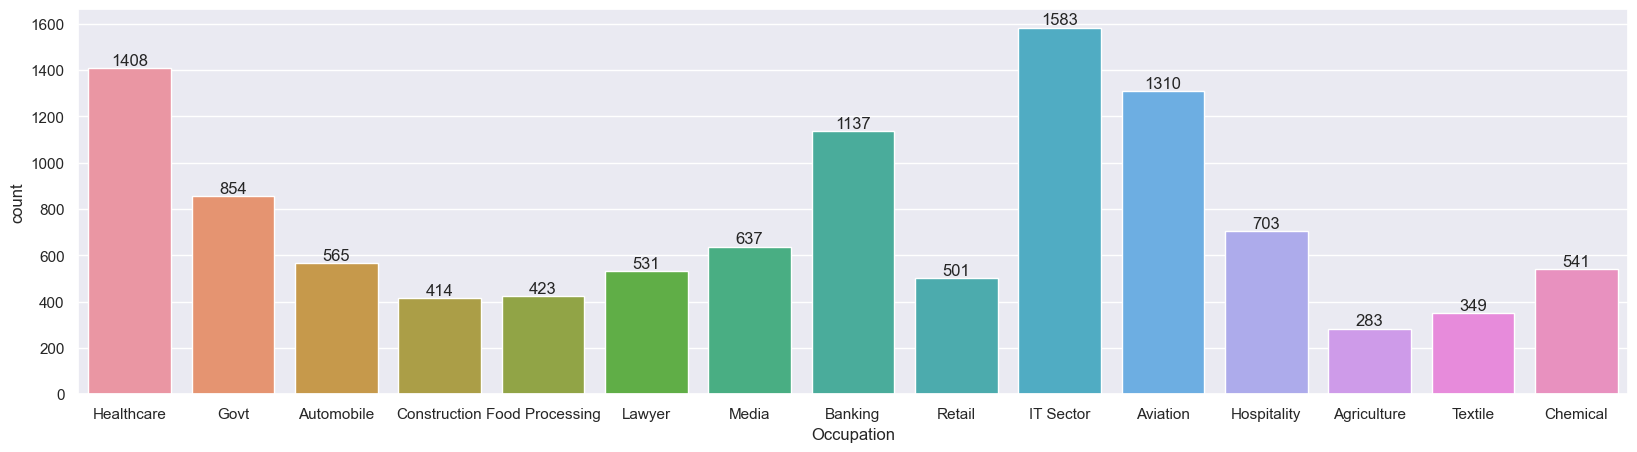

In [26]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)


<Axes: xlabel='Occupation', ylabel='Amount'>

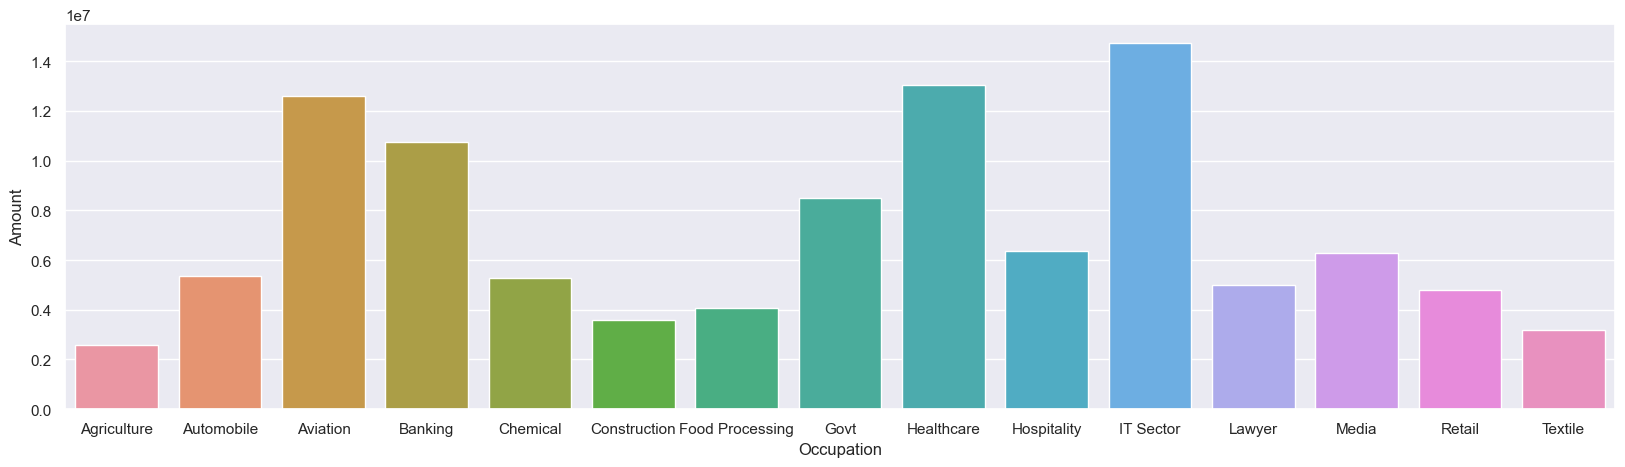

In [27]:
sales_occ=df.groupby('Occupation',as_index=False)['Amount'].sum()
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=sales_occ,x='Occupation',y='Amount')

From above graph we can say that most buyers are from IT Sector,Healthcare and activation occupation

#### Product Category

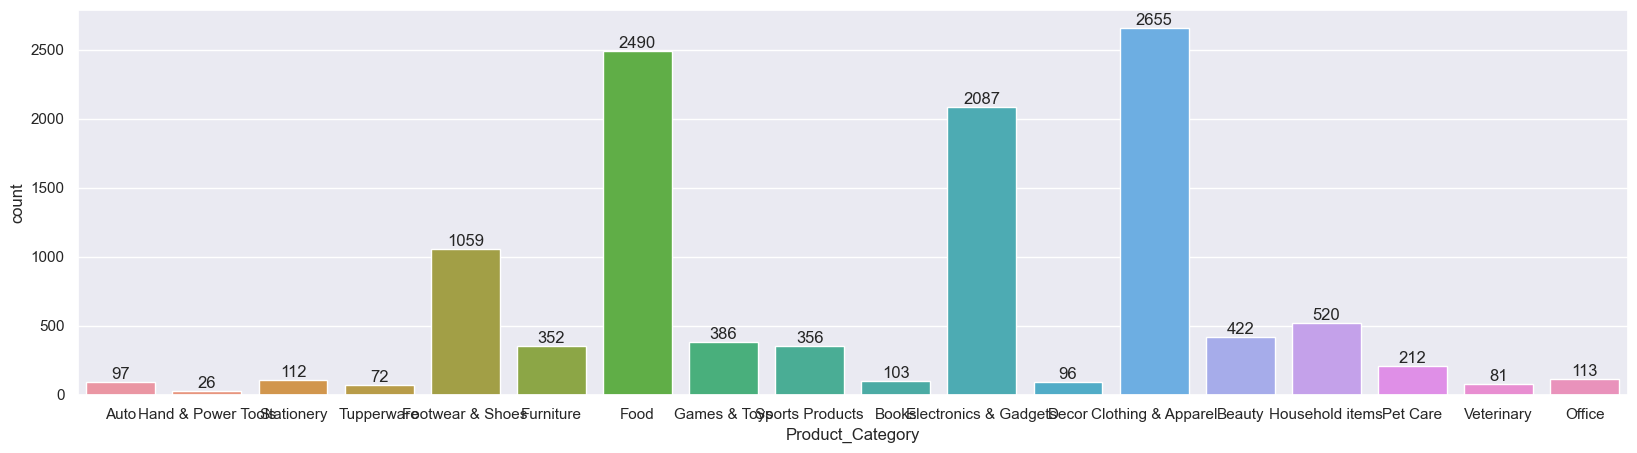

In [28]:
ax=sns.countplot(data =df, x='Product_Category')
sns.set(rc={'figure.figsize':(30,8)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

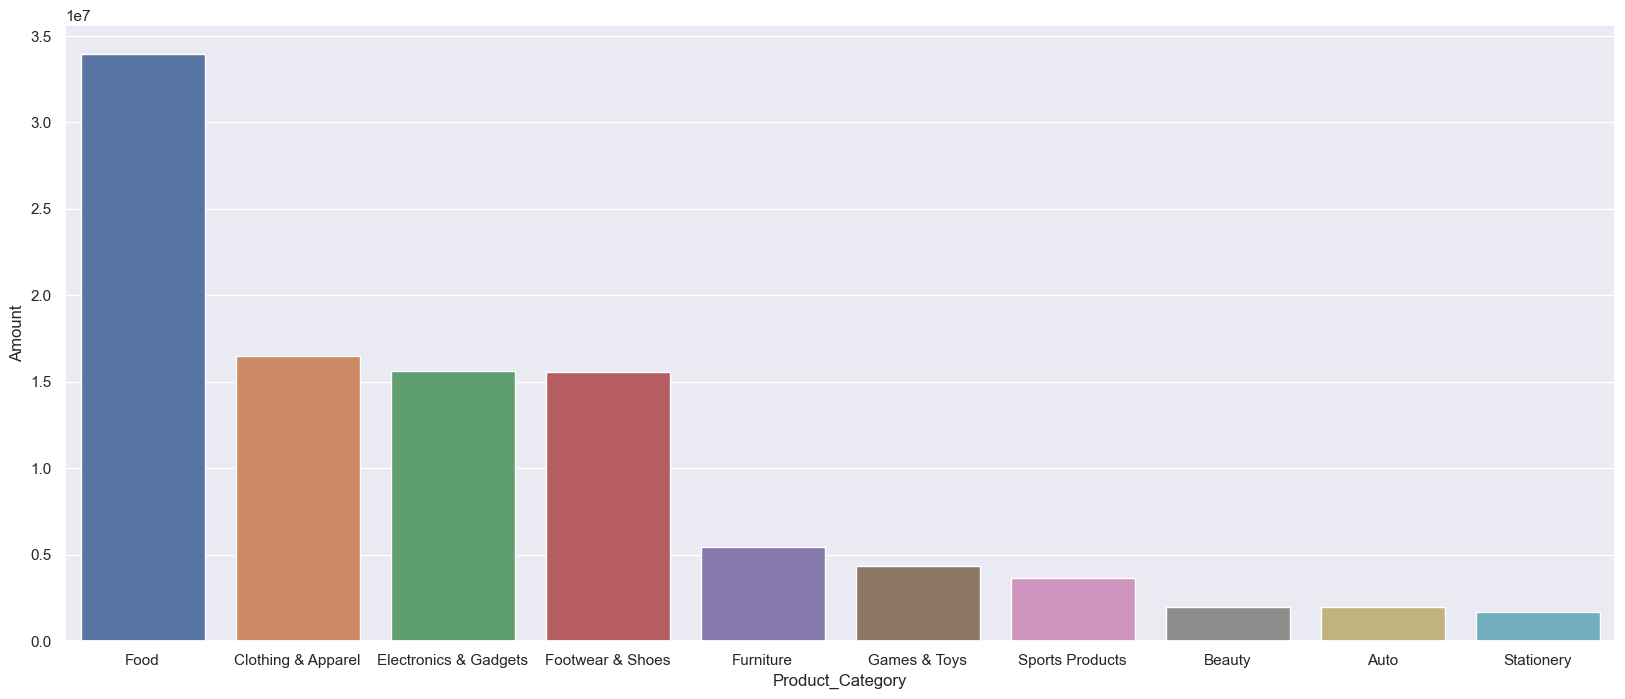

In [29]:
sns.set(rc={'figure.figsize':(20,8)})
sales_prod=df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values('Amount',ascending=False).head(10)
sns.barplot(data=sales_prod,x='Product_Category',y='Amount')

From the above graph we can see that most of the sold product are Food,clothing and electronics

##### Top 10 most sold product's ID

<Axes: xlabel='Product_ID', ylabel='Orders'>

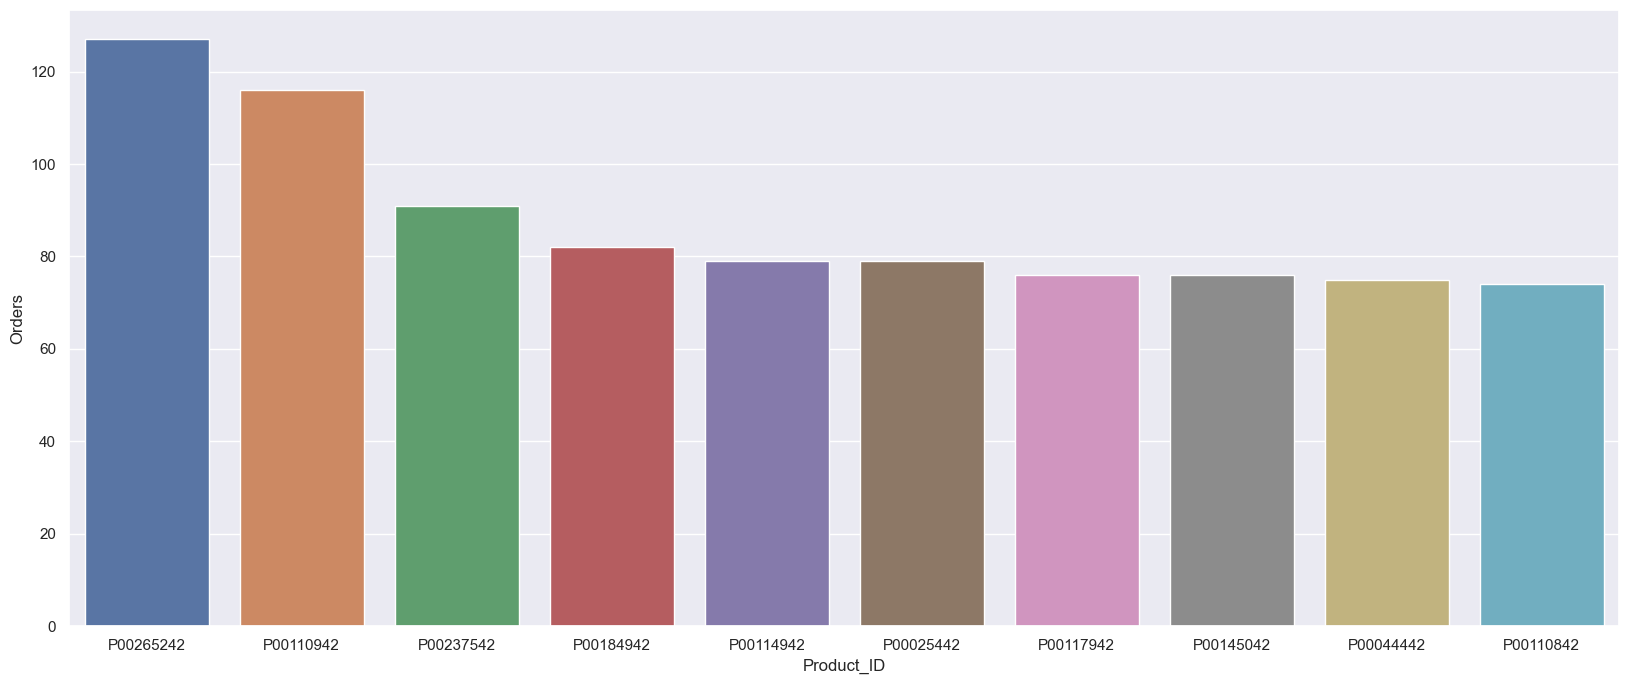

In [30]:
sales_prod=df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values('Orders',ascending=False).head(10)
sns.barplot(data=sales_prod,x='Product_ID',y='Orders')

### Conclusion

###### Married Women of Age between 26-35 from Uttar Pradesh, Maharastra, Karnataka, Delhi working in IT, Aviation, Healthcare are tend to buy more products from Food,clothing,Electronics.